<a href="https://colab.research.google.com/github/mahidher/Linear-Regression/blob/master/Linear_regression(Advertising%20data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Advertising.csv")

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.shape

(200, 5)

In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Relation between feature and target column

Normal method of plotting


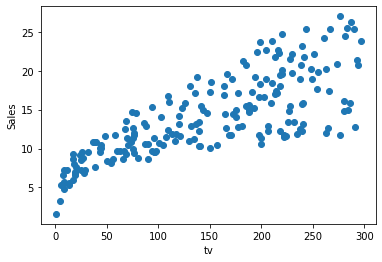

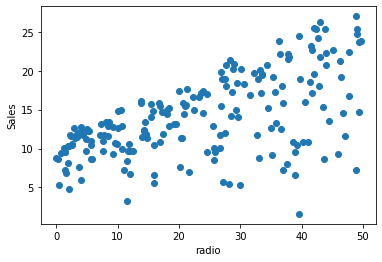

In [ ]:
plt.xlabel("tv")
plt.ylabel("Sales")
plt.scatter(data["TV"],data["sales"])
plt.show()
plt.xlabel("radio")
plt.ylabel("Sales")
plt.scatter(data["radio"],data["sales"])
plt.show()

Using subplot above each plot


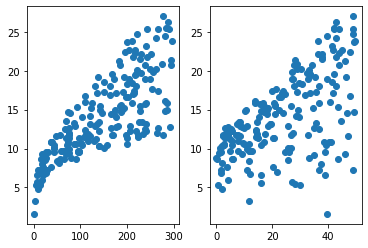

In [ ]:
plt.subplot(1,2,1)
plt.scatter(data["TV"],data["sales"])
plt.subplot(1,2,2)
plt.scatter(data["radio"],data["sales"])


Using subplots to get tuple of axes and assigning it to each plot


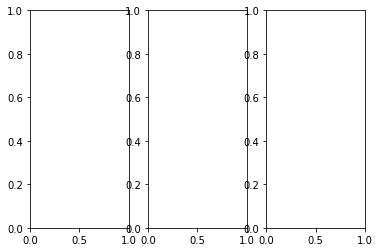

In [ ]:
fig,subplot = plt.subplots(1,3)

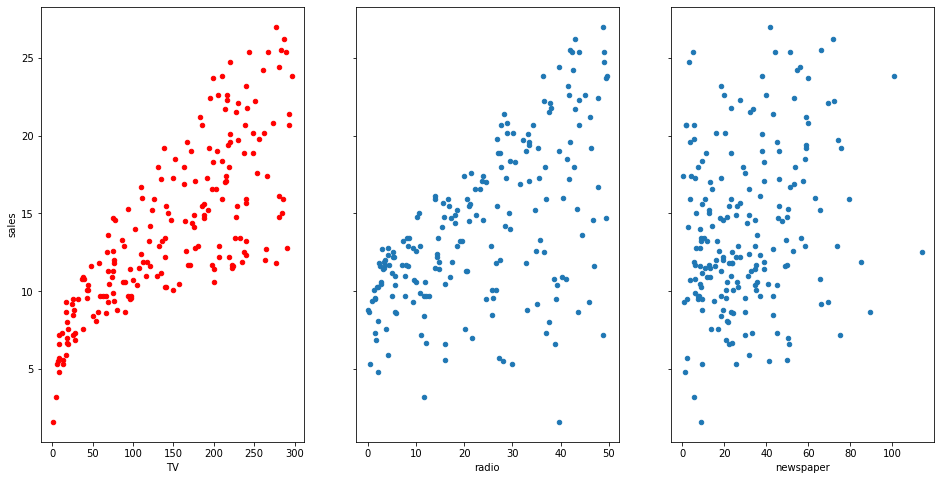

In [ ]:
fig,subplot = plt.subplots(1,3,sharey=True,figsize=(16, 8))
data.plot(kind="scatter",x="TV",y="sales",ax=subplot[0],color="red")
data.plot(kind='scatter', x='radio', y='sales', ax=subplot[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=subplot[2])

Now lets interpret the model

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[["TV"]]
y= data["sales"]
lr = LinearRegression()
model = lr.fit(X,y)


In [ ]:
y_pred = model.predict(X)

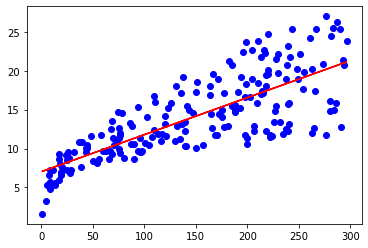

In [ ]:
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="blue")

lets see the m and c values

In [ ]:
model.coef_

array([0.04753664])

In [ ]:
model.intercept_

7.032593549127695

Now lets try to use the statsmodel library to see summary our Linear regression


In [ ]:
import statsmodels.api as sm

In [ ]:
lm = sm.OLS(data['sales'],data[['TV']]).fit()

In [ ]:
X = data[['TV']]
X = sm.add_constant(X)
lm = sm.OLS(data['sales'],X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        06:05:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = data[['TV','radio']]
X = sm.add_constant(X)
lm = sm.OLS(data['sales'],X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        06:05:56   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = data[['TV','radio','newspaper']]
X = sm.add_constant(X)
lm = sm.OLS(data['sales'],X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        06:05:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now lets see how to handle categorical data

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
np.random.seed(100)
x = np.random.rand(len(data))


In [ ]:
mask_large = x>0.5
mask_large

array([ True, False, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

In [ ]:
data['Scale']='small'
data.loc[mask_large,'Scale']='large'

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,large
4,5,180.8,10.8,58.4,12.9,small


lets encode the scale column

In [ ]:
data['Scale']=data['Scale'].map({'small':0,'large':1})

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,1
1,2,44.5,39.3,45.1,10.4,0
2,3,17.2,45.9,69.3,9.3,0
3,4,151.5,41.3,58.5,18.5,1
4,5,180.8,10.8,58.4,12.9,0


now lets encode more than 2 catagories






In [ ]:
x = np.random.rand(len(data))
big = x<0.3
small = x>0.6
data['togography']='medium'
data.loc[big,'togography'] = 'big'
data.loc[small,'togography'] =  'small'

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,togography
0,1,230.1,37.8,69.2,22.1,1,medium
1,2,44.5,39.3,45.1,10.4,0,small
2,3,17.2,45.9,69.3,9.3,0,medium
3,4,151.5,41.3,58.5,18.5,1,small
4,5,180.8,10.8,58.4,12.9,0,small


In [ ]:
dumm=pd.get_dummies(data['togography'],drop_first=True,prefix="topography")

In [ ]:
data = pd.concat([data,dumm],axis=1)

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,togography,topography_medium,topography_small
0,1,230.1,37.8,69.2,22.1,1,medium,1,0
1,2,44.5,39.3,45.1,10.4,0,small,0,1
2,3,17.2,45.9,69.3,9.3,0,medium,1,0
3,4,151.5,41.3,58.5,18.5,1,small,0,1
4,5,180.8,10.8,58.4,12.9,0,small,0,1


Now lets remove togography column since we already created dummies

In [ ]:
data.drop(["togography"],axis=1,inplace=True)

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,topography_medium,topography_small
0,1,230.1,37.8,69.2,22.1,1,1,0
1,2,44.5,39.3,45.1,10.4,0,0,1
2,3,17.2,45.9,69.3,9.3,0,1,0
3,4,151.5,41.3,58.5,18.5,1,0,1
4,5,180.8,10.8,58.4,12.9,0,0,1


lets see the correlation between features

In [ ]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,topography_medium,topography_small
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616,0.009881,0.036514,-0.114621
TV,0.017715,1.000000,0.054809,0.056648,0.782224,0.084844,0.047385,0.015534
radio,-0.110680,0.054809,1.000000,0.354104,0.576223,0.015513,0.041268,0.011583
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299,-0.039612,-0.090098,0.052583
sales,-0.051616,0.782224,0.576223,0.228299,1.000000,0.102765,0.074377,0.048822
Scale,0.009881,0.084844,0.015513,-0.039612,0.102765,1.000000,-0.059724,0.051408
topography_medium,0.036514,0.047385,0.041268,-0.090098,0.074377,-0.059724,1.000000,-0.513673
topography_small,-0.114621,0.015534,0.011583,0.052583,0.048822,0.051408,-0.513673,1.000000


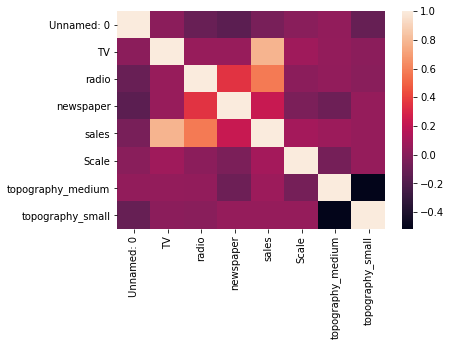

In [ ]:
sns.heatmap(data.corr())
plt.show()